In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os


In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive (5).zip to archive (5).zip


In [3]:
import zipfile

with zipfile.ZipFile("archive (5).zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("Unzipped successfully")

Unzipped successfully


In [4]:
import os
os.listdir("dataset")

['data.csv']

In [5]:
import pandas as pd

data = pd.read_csv("dataset/data.csv", encoding="latin1")
data.head(10)


/tmp/ipython-input-2864428026.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset/data.csv", encoding="latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [6]:
x = data['no2'].dropna()
x = x.values


In [7]:
len(x), x[:10]


(419509, array([17.4,  7. , 28.5, 14.7,  7.5, 25.7, 17.1,  8.7, 23. ,  8.9]))

In [8]:
r = 102303742

a_r = 0.5 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

a_r, b_r


(1.0, 0.8999999999999999)

In [9]:
z = x + a_r * np.sin(b_r * x)
z = z.reshape(-1, 1)

z[:10]



array([[17.44794488],
       [ 7.0168139 ],
       [28.99449938],
       [15.31597999],
       [ 7.95004407],
       [24.79184674],
       [17.41263257],
       [ 9.69971245],
       [23.96115272],
       [ 9.8878538 ]])

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim



In [11]:
z_tensor = torch.tensor(z, dtype=torch.float32)



In [12]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)




In [13]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)



In [14]:
G = Generator()
D = Discriminator()

criterion = nn.BCELoss()

optimizer_G = optim.Adam(G.parameters(), lr=0.001)
optimizer_D = optim.Adam(D.parameters(), lr=0.001)



In [15]:
epochs = 10000
batch_size = 64

for epoch in range(epochs):


    idx = np.random.randint(0, len(z_tensor), batch_size)
    real_samples = z_tensor[idx]

    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    noise = torch.randn(batch_size, 1)
    fake_samples = G(noise)

    D_real_loss = criterion(D(real_samples), real_labels)
    D_fake_loss = criterion(D(fake_samples.detach()), fake_labels)
    D_loss = D_real_loss + D_fake_loss

    optimizer_D.zero_grad()
    D_loss.backward()
    optimizer_D.step()

    noise = torch.randn(batch_size, 1)
    generated_samples = G(noise)

    G_loss = criterion(D(generated_samples), real_labels)

    optimizer_G.zero_grad()
    G_loss.backward()
    optimizer_G.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {D_loss.item():.4f} | G Loss: {G_loss.item():.4f}")





Epoch 0 | D Loss: 0.8260 | G Loss: 0.6380
Epoch 500 | D Loss: 1.3843 | G Loss: 0.6700
Epoch 1000 | D Loss: 1.3067 | G Loss: 0.6852
Epoch 1500 | D Loss: 1.3952 | G Loss: 0.6905
Epoch 2000 | D Loss: 1.3956 | G Loss: 0.6784
Epoch 2500 | D Loss: 1.3851 | G Loss: 0.6328
Epoch 3000 | D Loss: 1.4439 | G Loss: 0.7131
Epoch 3500 | D Loss: 1.4010 | G Loss: 0.8217
Epoch 4000 | D Loss: 1.3911 | G Loss: 0.7074
Epoch 4500 | D Loss: 1.3848 | G Loss: 0.7200
Epoch 5000 | D Loss: 1.4125 | G Loss: 0.6483
Epoch 5500 | D Loss: 1.3849 | G Loss: 0.6763
Epoch 6000 | D Loss: 1.3837 | G Loss: 0.6815
Epoch 6500 | D Loss: 1.3816 | G Loss: 0.6712
Epoch 7000 | D Loss: 1.3835 | G Loss: 0.7289
Epoch 7500 | D Loss: 1.3879 | G Loss: 0.7077
Epoch 8000 | D Loss: 1.3841 | G Loss: 0.7548
Epoch 8500 | D Loss: 1.3836 | G Loss: 0.6572
Epoch 9000 | D Loss: 1.3913 | G Loss: 0.6723
Epoch 9500 | D Loss: 1.3907 | G Loss: 0.7331


In [16]:
with torch.no_grad():
    noise = torch.randn(10000, 1)
    z_fake = G(noise).numpy()



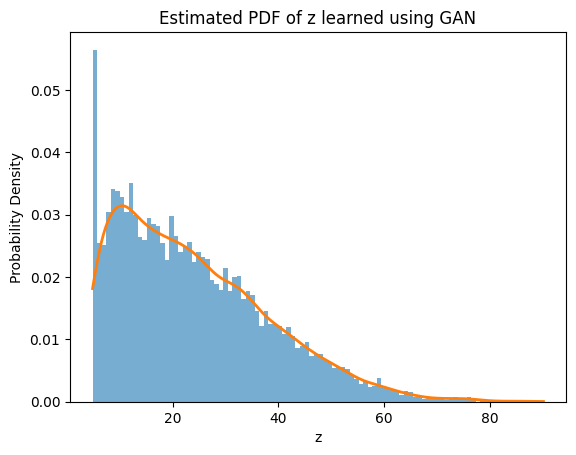

In [18]:
from scipy.stats import gaussian_kde

plt.figure()

# Histogram (existing)
plt.hist(z_fake, bins=100, density=True, alpha=0.6)

# KDE line
kde = gaussian_kde(z_fake.flatten())
z_range = np.linspace(z_fake.min(), z_fake.max(), 1000)
plt.plot(z_range, kde(z_range), linewidth=2)

plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Estimated PDF of z learned using GAN")
plt.show()


